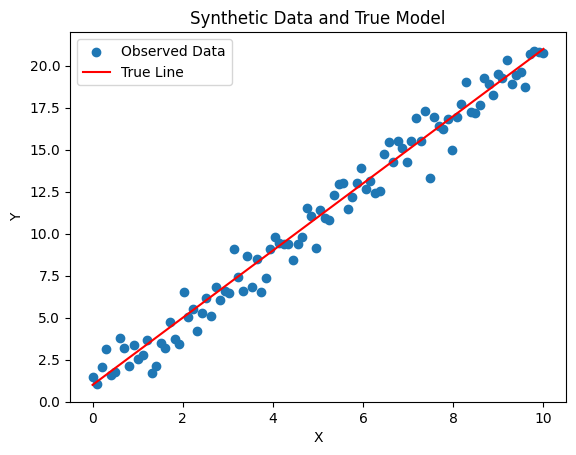

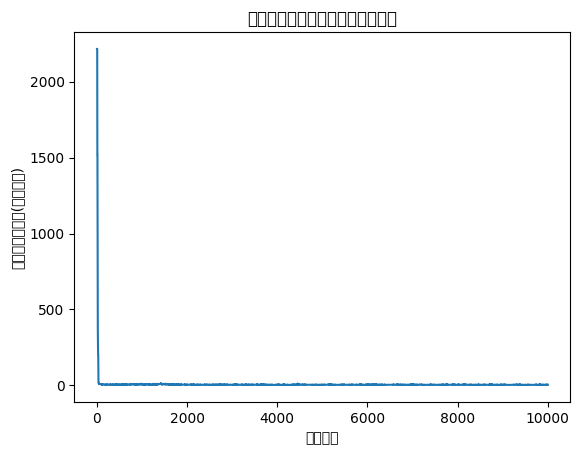

/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10524/754102801.py:86: UserWarning: Glyph 26012 (\N{CJK UNIFIED IDEOGRAPH-659C}) missing from current font.
  plt.tight_layout()
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10524/754102801.py:86: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10524/754102801.py:86: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10524/754102801.py:86: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10524/754102801.py:86: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  plt.tight_layout()
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_1

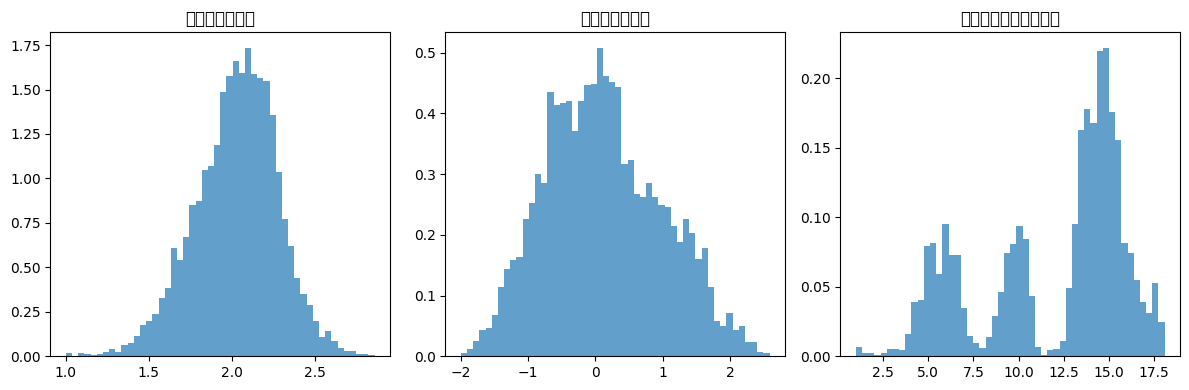

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 真实参数
true_slope = 2.0
true_intercept = 1.0

# 生成合成数据
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, len(x_values))
y_values = true_slope * x_values + true_intercept + noise

# 绘制合成数据
plt.scatter(x_values, y_values, label='Observed Data')
plt.plot(x_values, true_slope * x_values + true_intercept, 'r', label='True Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data and True Model')
plt.show()


# Metropolis-Hastings MCMC采样

# 定义负对数后验概率(代价函数)
def neg_log_posterior(params, x, y):
    slope, intercept, sigma = params
    predicted = slope * x + intercept
    likelihood_term = 0.5 * np.sum((y - predicted)**2) / sigma**2
    prior_term = 0.5 * (slope**2 + intercept**2)  # 简单的高斯先验
    return likelihood_term + prior_term

# Metropolis-Hastings MCMC采样
def metropolis_hastings(initial_params, iterations, x, y):
    params_chain = [initial_params]
    cost_function_chain = [neg_log_posterior(initial_params, x, y)]

    for _ in range(iterations):
        current_params = params_chain[-1]
        proposed_params = current_params + np.random.normal(0, 0.1, len(current_params))

        # 计算当前和建议参数状态的负对数后验概率
        cost_function_current = neg_log_posterior(current_params, x, y)
        cost_function_proposed = neg_log_posterior(proposed_params, x, y)

        # 接受或拒绝建议状态的决策基于Metropolis准则
        acceptance_ratio = cost_function_current - cost_function_proposed
        if np.log(np.random.uniform(0, 1)) < acceptance_ratio:
            params_chain.append(proposed_params)
            cost_function_chain.append(cost_function_proposed)
        else:
            params_chain.append(current_params)
            cost_function_chain.append(cost_function_current)

    return np.array(params_chain), np.array(cost_function_chain)

# 初始猜测的模型参数
initial_params = np.array([1.0, 0.0, 1.0])  # [斜率, 截距, 噪声标准差]

# 运行Metropolis-Hastings MCMC采样
iterations = 10000
params_chain, cost_function_chain = metropolis_hastings(initial_params, iterations, x_values, y_values)

# 绘制负对数后验概率(代价函数)随迭代次数的变化
plt.plot(cost_function_chain)
plt.xlabel('迭代次数')
plt.ylabel('负对数后验概率(代价函数)')
plt.title('负对数后验概率随迭代次数的变化')
plt.show()

# 绘制参数的后验分布
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(params_chain[:, 0], bins=50, density=True, alpha=0.7)
plt.title('斜率的后验分布')

plt.subplot(132)
plt.hist(params_chain[:, 1], bins=50, density=True, alpha=0.7)
plt.title('截距的后验分布')

plt.subplot(133)
plt.hist(params_chain[:, 2], bins=50, density=True, alpha=0.7)
plt.title('噪声标准差的后验分布')

plt.tight_layout()
plt.show()
